In [66]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [67]:
df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4824,3339-EAQNV,Male,1,Yes,No,72,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,One year,Yes,Credit card (automatic),97.25,7133.1,No
4903,7330-WZLNC,Female,0,No,No,5,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,90.80,455.5,Yes
467,5968-XQIVE,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,One year,Yes,Electronic check,89.70,6588.95,No
2699,9508-ILZDG,Female,1,No,No,34,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Electronic check,96.35,3190.25,No
6019,0440-MOGPM,Female,0,No,No,41,Yes,Yes,DSL,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,80.55,3263.9,No


In [68]:
df.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [69]:
df.drop('customerID', axis = 'columns', inplace = True)

In [70]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [71]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [72]:
pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [73]:
df[pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [74]:
df.shape

(7043, 20)

In [75]:
df.iloc[488].TotalCharges

' '

In [76]:
df[df.TotalCharges!= ' '].shape

(7032, 20)

In [77]:
df1 = df.copy()

In [78]:
df1 = df[df.TotalCharges!= ' ']
df1.shape

(7032, 20)

In [79]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [80]:
df1.loc[:, 'TotalCharges'] = pd.to_numeric(df1['TotalCharges'], errors='coerce')

In [108]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [82]:
df1[df1.Churn == 'No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


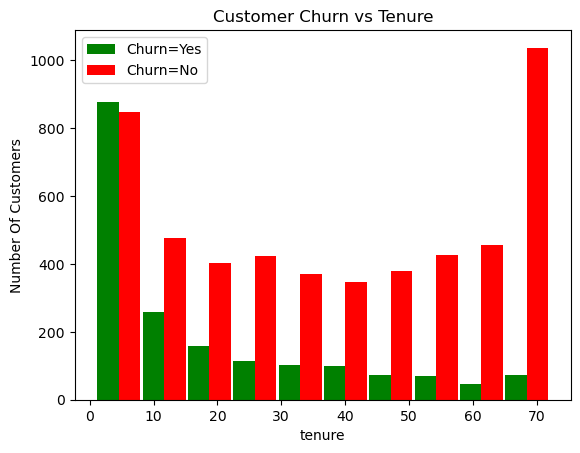

In [83]:
tenure_churn_no = df1[df1.Churn == 'No'].tenure
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure
plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn vs Tenure")
plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=["green", "red"], label=['Churn=Yes', 'Churn=No'])
plt.legend()
plt.show()


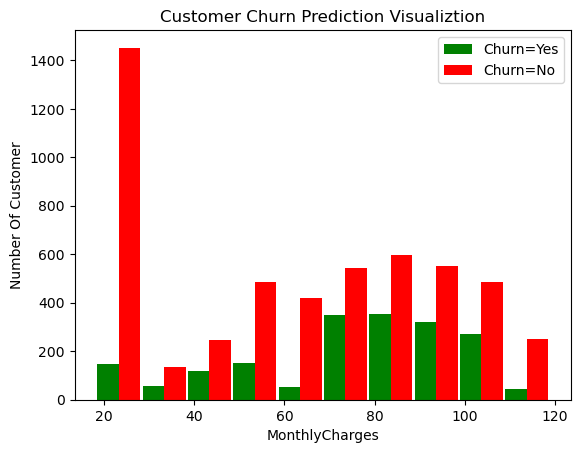

In [85]:
mc_churn_no = df1[df1.Churn == 'No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges

plt.xlabel("MonthlyCharges")
plt.ylabel("Number Of Customer")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=["green", "red"], label=['Churn=Yes', 'Churn=No'])
plt.legend()

In [86]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column}: {df[column].unique()}')

In [87]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: [29.85 1889.5 108.15 ... 346.45 306.6 6844.5]
Churn: ['No' 'Yes']


In [88]:
df1 = df1.replace('No internet service', 'No')
df1 = df1.replace('No phone service', 'No')

In [89]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [90]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                  'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1, 'No': 0}, inplace = True)

In [91]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [92]:
df1['gender'].replace({'Female': 1, 'Male': 0}, inplace = True)

In [93]:
df1.gender.unique()

array([1, 0], dtype=int64)

In [94]:
df2 = df1.copy()

In [95]:
df2 = pd.get_dummies(data=df1, columns=['InternetService', 'Contract', 'PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [96]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5036,1,1,1,0,16,1,1,0,0,0,...,False,True,False,True,False,False,False,True,False,False
2296,0,1,0,0,1,1,0,0,0,0,...,True,False,False,True,False,False,False,False,True,False
3137,1,0,1,1,41,1,1,0,1,1,...,False,True,False,False,True,False,True,False,False,False
2461,1,0,0,0,70,1,0,0,0,0,...,False,False,True,False,True,False,True,False,False,False
91,0,1,0,0,1,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False


In [97]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

In [98]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [99]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [100]:
X = df2.drop('Churn', axis = 'columns')
y = testLabels = df2.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=15, stratify=y)

In [101]:
y_train.value_counts()

Churn
0.0    4130
1.0    1495
Name: count, dtype: int64

In [102]:
y.value_counts()

Churn
0.0    5163
1.0    1869
Name: count, dtype: int64

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [104]:
from sklearn.linear_model import LogisticRegression

# Khởi tạo mô hình Logistic Regression
model = LogisticRegression(max_iter=1000)

# Huấn luyện mô hình trên tập huấn luyện
model.fit(X_train, y_train)

# In ra các hệ số hồi quy
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
print(coefficients.sort_values(by='Coefficient', ascending=False))


                                    Feature  Coefficient
15                             TotalCharges     1.409380
17              InternetService_Fiber optic     0.761615
19                  Contract_Month-to-month     0.746242
13                         PaperlessBilling     0.336755
24           PaymentMethod_Electronic check     0.283960
12                          StreamingMovies     0.249161
11                              StreamingTV     0.228172
6                             MultipleLines     0.221917
1                             SeniorCitizen     0.137346
0                                    gender     0.060603
2                                   Partner     0.041488
20                        Contract_One year     0.009712
16                      InternetService_DSL     0.004839
9                          DeviceProtection     0.002668
14                           MonthlyCharges    -0.008251
22  PaymentMethod_Bank transfer (automatic)    -0.035675
8                              

In [105]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Dự đoán
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Xác suất thuộc nhóm "Yes"

# Tính toán độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Báo cáo chi tiết Precision, Recall, F1-Score
print(classification_report(y_test, y_pred))


Accuracy: 0.8031272210376688
              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1033
         1.0       0.66      0.54      0.59       374

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.80      1407



ROC-AUC Score: 0.8397650268415031


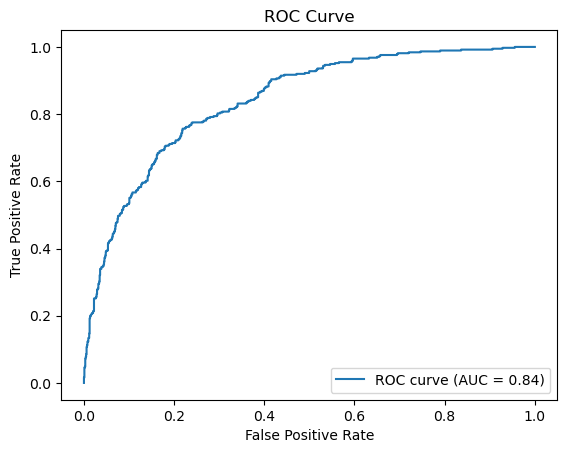

In [106]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc}")

# Vẽ biểu đồ đường cong ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [146]:
import numpy as np

# Các hệ số đã cho (bao gồm intercept)
coefficients = {
    'intercept': -0.5,  # Giả sử giá trị intercept (chặn) là -0.5
    'gender': 0.060603,
    'SeniorCitizen': 0.137346,
    'tenure': -0.03,  # Điều chỉnh giá trị để hợp lý hơn
    'TotalCharges': 0.014,  # Điều chỉnh để phù hợp với tỷ lệ
    'InternetService_Fiber optic': 0.761615,
    'Contract_Month-to-month': 0.746242,
    'PaperlessBilling': 0.336755,
    'PaymentMethod_Electronic check': 0.283960,
    'StreamingMovies': 0.249161,
}

# Dữ liệu khách hàng
customer_data = {
    'gender': 1,  # Giới tính 
    'SeniorCitizen': 0,  # Công dân cao tuổi
    'tenure': 1,  # Thời gian sử dụng dịch vụ
    'TotalCharges': 11,  # Tổng chi phí
    'InternetService_Fiber optic': 0,  # Sử dụng Fiber optic
    'Contract_Month-to-month': 0,  # Hợp đồng theo tháng
    'PaperlessBilling': 0,  # Hóa đơn điện tử
    'PaymentMethod_Electronic check': 1,  # Phương thức thanh toán qua séc điện tử
    'StreamingMovies': 0,  # Có sử dụng Streaming Movies
}

# Tính toán giá trị logit
logit = coefficients['intercept']  # Bắt đầu với hệ số chặn (intercept)
for feature, value in customer_data.items():
    logit += coefficients.get(feature, 0) * value

# Áp dụng hàm sigmoid
probability = 1 / (1 + np.exp(-logit))

# Dự đoán Churn
if probability >= 0.5:
    prediction = 1  # Khách hàng sẽ rời bỏ
else:
    prediction = 0  # Khách hàng không rời bỏ

print(f"Xác suất khách hàng sẽ rời bỏ dịch vụ: {probability:.4f}")
print(f"Dự đoán Churn: {prediction}")


Xác suất khách hàng sẽ rời bỏ dịch vụ: 0.4921
Dự đoán Churn: 0
